<a href="https://colab.research.google.com/github/RiniPaul86/Assignment/blob/main/CNN_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Image Classification of Cifar-10 Using CNN

####The CIFAR-10 dataset is a popular benchmark dataset used in the field of machine learning and computer vision. It stands for the "Canadian Institute for Advanced Research" and "10" refers to the number of classes in the dataset.

The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The classes are:

Airplane,
Automobile,
Bird,
Cat,
Deer,
Dog,
Frog,
Horse,
Ship,
Truck

These images are typically split into training and testing sets, with 50,000 images used for training and 10,000 images used for testing/validation.

CIFAR-10 is often used as a benchmark dataset for image classification tasks because of its relatively small size and its diverse set of classes. Researchers and practitioners use it to develop and evaluate various machine learning and deep learning algorithms for tasks such as object recognition, image classification, and image segmentation.





In [1]:
!pip install tensorflow

In [2]:
!pip install keras

# ***Importing Necessary Libraries***

In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ***Loading the Dataset***

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# ***Printing the shape of the dataset***


In [5]:
print("train_images shape :", train_images.shape)
print("train_labels shape :", train_labels.shape)
print("test_images shape  :", test_images.shape)
print("test_labels shape  :", test_labels.shape)

train_images shape : (50000, 32, 32, 3)
train_labels shape : (50000, 1)
test_images shape  : (10000, 32, 32, 3)
test_labels shape  : (10000, 1)


In [6]:
train_images[12]

array([[[164, 215, 244],
        [162, 212, 240],
        [162, 212, 240],
        ...,
        [157, 210, 237],
        [153, 208, 235],
        [153, 203, 234]],

       [[168, 218, 245],
        [166, 215, 242],
        [166, 215, 242],
        ...,
        [164, 212, 238],
        [160, 209, 236],
        [158, 205, 235]],

       [[172, 220, 246],
        [170, 217, 243],
        [171, 218, 244],
        ...,
        [168, 212, 238],
        [165, 208, 235],
        [163, 207, 236]],

       ...,

       [[123, 160, 105],
        [117, 154, 102],
        [112, 149,  99],
        ...,
        [117, 136, 100],
        [ 95, 115,  79],
        [120, 149, 100]],

       [[120, 156, 100],
        [116, 151,  99],
        [112, 147,  96],
        ...,
        [126, 149, 110],
        [120, 144, 103],
        [120, 152, 101]],

       [[121, 154,  96],
        [120, 152,  99],
        [116, 148,  97],
        ...,
        [124, 152, 108],
        [124, 154, 107],
        [120, 154, 100]]

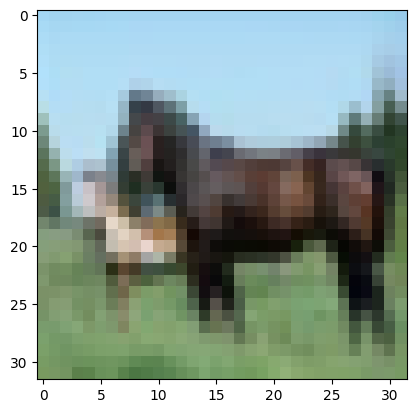

In [7]:
plt.imshow(train_images[12])
plt.show()

In [8]:
train_labels[12]

array([7], dtype=uint8)

In [9]:
# Mapping label integers to class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


# Assuming train_labels is loaded and contains the training labels
print("Class of the first training image:", class_names[train_labels[12][0]])

Class of the first training image: horse


# ***Performing Data Pre-Processing***




## Building the input vector from the 32x32 pixels

In [10]:
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [11]:
print("train_images shape :", train_images.shape)
print("train_labels shape :", train_labels.shape)
print("test_images shape  :", test_images.shape)
print("test_labels shape  :", test_labels.shape)

train_images shape : (50000, 32, 32, 3)
train_labels shape : (50000, 1)
test_images shape  : (10000, 32, 32, 3)
test_labels shape  : (10000, 1)


## ***Normalizing the Images***

In [12]:
# Normalize pixel values to the range [0, 1]
train_images = train_images/ 255.0
test_images = test_images/ 255.0

In [13]:
train_images[12]

array([[[0.6431373 , 0.84313726, 0.95686275],
        [0.63529414, 0.83137256, 0.9411765 ],
        [0.63529414, 0.83137256, 0.9411765 ],
        ...,
        [0.6156863 , 0.8235294 , 0.92941177],
        [0.6       , 0.8156863 , 0.92156863],
        [0.6       , 0.79607844, 0.91764706]],

       [[0.65882355, 0.85490197, 0.9607843 ],
        [0.6509804 , 0.84313726, 0.9490196 ],
        [0.6509804 , 0.84313726, 0.9490196 ],
        ...,
        [0.6431373 , 0.83137256, 0.93333334],
        [0.627451  , 0.81960785, 0.9254902 ],
        [0.61960787, 0.8039216 , 0.92156863]],

       [[0.6745098 , 0.8627451 , 0.9647059 ],
        [0.6666667 , 0.8509804 , 0.9529412 ],
        [0.67058825, 0.85490197, 0.95686275],
        ...,
        [0.65882355, 0.83137256, 0.93333334],
        [0.64705884, 0.8156863 , 0.92156863],
        [0.6392157 , 0.8117647 , 0.9254902 ]],

       ...,

       [[0.48235294, 0.627451  , 0.4117647 ],
        [0.45882353, 0.6039216 , 0.4       ],
        [0.4392157 , 0

In [14]:
print("Min pixel value:", train_images[0].min())
print("Max pixel value:", train_images[0].max())

Min pixel value: 0.0
Max pixel value: 1.0


## ***Performing One-Hot encoding using keras' numpy-related utilities***

In [15]:
n_classes = 10
print("Shape before one-hot encoding : ",train_labels.shape)
train_Labels = to_categorical(train_labels, n_classes)
test_Labels  =  to_categorical(test_labels, n_classes)
print("Shape after one-hot encoding  : ",train_Labels.shape)

Shape before one-hot encoding :  (50000, 1)
Shape after one-hot encoding  :  (50000, 10)


In [16]:
train_labels[12]

array([7], dtype=uint8)

In [17]:
train_Labels[12]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# ***Building the CNN Model***

In [18]:
# sequential layer
model = Sequential()
# 3 convolutional layer and 2 max pooling
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu')),
model.add(MaxPool2D((2, 2))),
model.add(Conv2D(64, (3, 3), activation='relu')),
# flatten output of convolutional layer
model.add(Flatten())
# hidden layer
model.add(Dense(64, activation='relu'))
# output layer
model.add(Dense(10, activation='softmax'))

##***Summarizing the Model***

In [19]:
model.summary(line_length=100)

Model: "sequential"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d (Conv2D)                             (None, 30, 30, 32)                      896            
                                                                                                    
 max_pooling2d (MaxPooling2D)                (None, 15, 15, 32)                      0              
                                                                                                    
 conv2d_1 (Conv2D)                           (None, 13, 13, 64)                      18496          
                                                                                                    
 max_pooling2d_1 (MaxPooling2D)              (None, 6, 6, 64)                        0              
                                                                       

# ***Compiling the Model***

In [20]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


# ***Training the Model***

In [21]:
model.fit(train_images,train_Labels,batch_size= 32, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.5510 - accuracy: 0.4359
Epoch 2/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.1745 - accuracy: 0.5844
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.0176 - accuracy: 0.6425
Epoch 4/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.9159 - accuracy: 0.6783
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8412 - accuracy: 0.7062
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7772 - accuracy: 0.7263
Epoch 7/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.7205 - accuracy: 0.7468
Epoch 8/10
1563/1563 [==============================] - 56s 36ms/step - loss: 0.6783 - accuracy: 0.7625
Epoch 9/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6308 - accuracy: 0.7789
Epoch 10/10
1563/1563 [==============================] - 56s 36m

# ***Evaluating the Model***

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_Labels)

313/313 [==============================] - 4s 11ms/step - loss: 0.9310 - accuracy: 0.7020


In [23]:
print('Model Accuracy :', test_acc)
print('Model Loss     :', test_loss)

Model Accuracy : 0.7020000219345093
Model Loss     : 0.931014358997345


# ***Performing the Prediction using the Trained Model***

In [24]:
test_images[29]

array([[[0.34509805, 0.5058824 , 0.16470589],
        [0.3254902 , 0.5411765 , 0.16470589],
        [0.39607844, 0.6666667 , 0.21176471],
        ...,
        [0.44313726, 0.61960787, 0.20392157],
        [0.4       , 0.54509807, 0.18039216],
        [0.36078432, 0.48235294, 0.14901961]],

       [[0.36078432, 0.5019608 , 0.1254902 ],
        [0.43137255, 0.6392157 , 0.27058825],
        [0.5137255 , 0.69411767, 0.3529412 ],
        ...,
        [0.4392157 , 0.5921569 , 0.15294118],
        [0.41960785, 0.5921569 , 0.17254902],
        [0.41568628, 0.6117647 , 0.21176471]],

       [[0.44313726, 0.48235294, 0.18431373],
        [0.6627451 , 0.67058825, 0.5058824 ],
        [0.7137255 , 0.6901961 , 0.5176471 ],
        ...,
        [0.34509805, 0.45490196, 0.12941177],
        [0.3882353 , 0.5058824 , 0.13725491],
        [0.41960785, 0.5647059 , 0.18039216]],

       ...,

       [[0.25882354, 0.17254902, 0.05882353],
        [0.2901961 , 0.21568628, 0.09803922],
        [0.46666667, 0

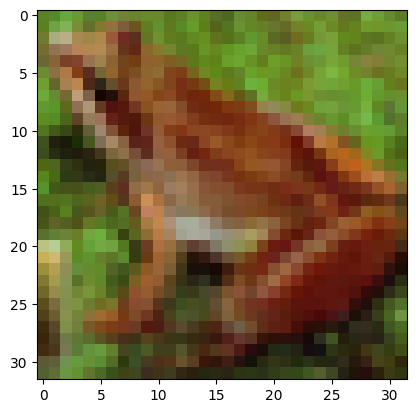

In [25]:
plt.imshow(test_images[29])
plt.show()

In [26]:
test_images[29].shape

(32, 32, 3)

In [27]:
model.predict(test_images[29].reshape(1,32,32,3))

1/1 [==============================] - 0s 109ms/step


array([[2.5584798e-06, 8.1793537e-08, 1.3549571e-03, 2.1479200e-04,
        3.0790928e-03, 1.3027526e-05, 9.9533540e-01, 2.8671080e-08,
        3.4410348e-08, 1.1490579e-07]], dtype=float32)

In [28]:
np.argmax(model.predict(test_images[29].reshape(1,32,32,3)))

1/1 [==============================] - 0s 22ms/step


6

In [29]:
print("Class of the first testing image:", class_names[test_labels[29][0]])

Class of the first testing image: frog
